# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [3]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
haberman=pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

<h3>Number of data points</h3>
<p>The Haberman Cancer Survival dataset has 306 data points.</p>

In [4]:
haberman.shape

(306, 4)

<h3>Number of features</h3>
<p>It has three features namely
<ul>
    <li>'age' is patient's age at the time of surgery.</li>
    <li>'year' is patient's year of operation </li>
    <li>'nodes' is number of positive axillary nodes detected</li>

</ul>

In [5]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

<h3>Number of classes </h3>
<p>It was two distinct classes that are indicated in status column as 1 and 2. status is an integer code for the survial status of the patient after surgery. The code 1 indicates that the patient survived 5 years or longer
whereas 2 represent the patient died within 5 year. </p>

<h3>Number of data points per class </h3>
<p>Class denoted by 1 has 225 data points whereas class denoted by 2 has 81 data points.<p>
    
<p> Observation: The Haberman Cancer Survival dataset dataset is an unbalanced dataset as the number of data points of two classes are different.</p>

In [6]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<h3>Libraries used </h3>


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h4>Objective of the problem</h4>
The objective of the problem is to determine the survival status of new patient undergoing the operation given the age of the patient, year of operation and number of axial nodes.

### 1.3 Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

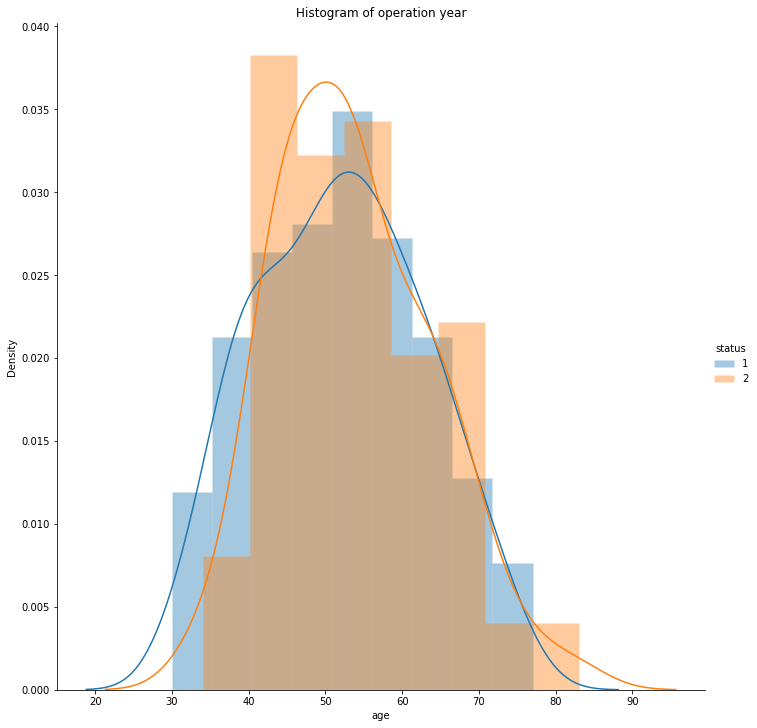

In [49]:
sns.FacetGrid(haberman, hue="status",height=10) \
   .map(sns.histplot, "age", kde=True,
    stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .01)) \
   .add_legend();
plt.title('Histogram of operation year')
plt.show();

<h5>Observation</h5>
</p>The average age of patients is around 52 years. The modal class of patient's age is 50-60 years for longer survial period whereas the modal class for 40-50 years for patients'age with shorter survial period. The patients in early adulthood (20's to 30's) are more likely to have longer survial period than shorter survival period after operations. The patients in middle adulhood (40's to 60's) are less likely to have longer survival period than shorter survial period.<p>

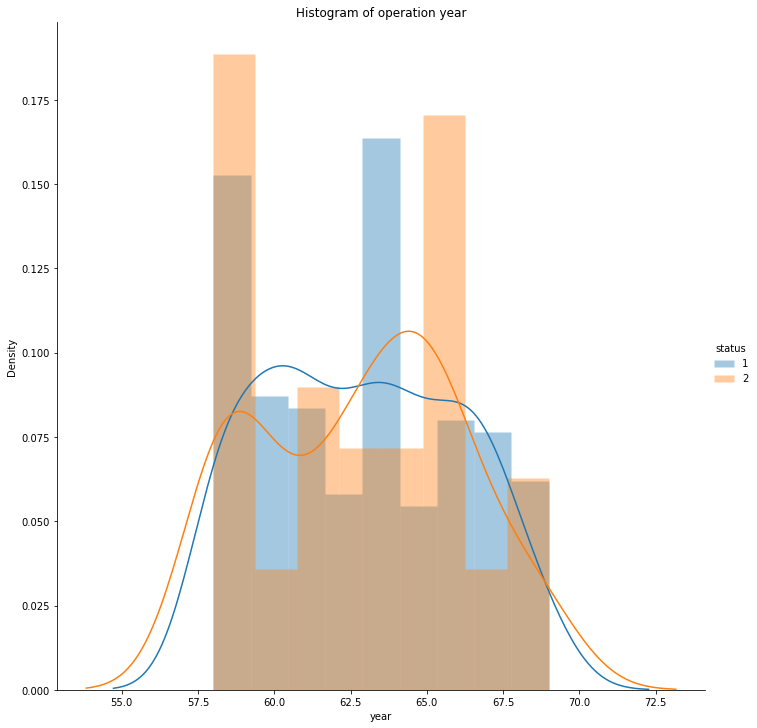

In [47]:
sns.FacetGrid(haberman, hue="status",height=10) \
   .map(sns.histplot, "year", kde=True,
    stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .01)) \
   .add_legend();
plt.title('Histogram of operation year')
plt.show();

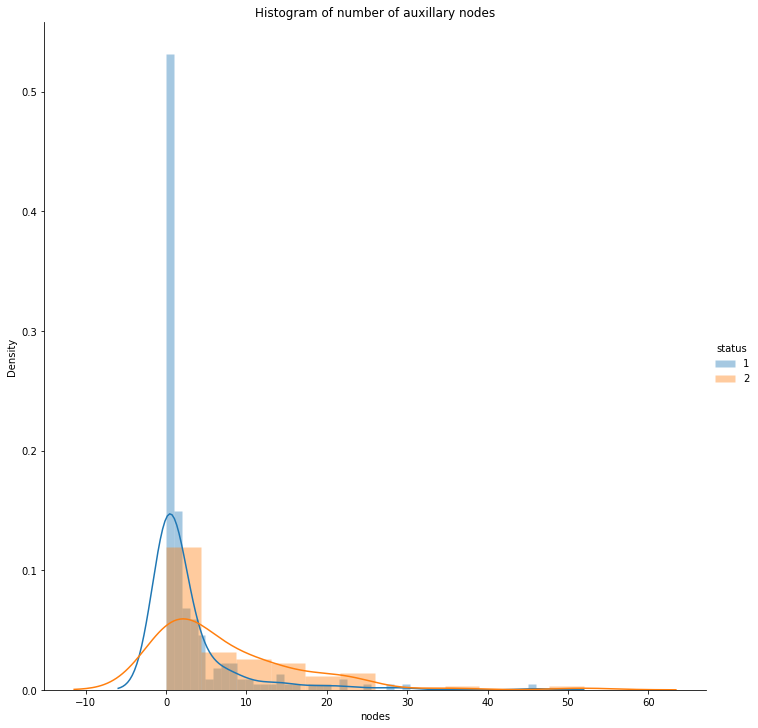

In [50]:
sns.FacetGrid(haberman, hue="status",height=10) \
   .map(sns.histplot, "nodes", kde=True,
    stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .01)) \
   .add_legend();
plt.title('Histogram of number of auxillary nodes')
plt.show();

<h5>Observation:</h5>
<p> The figure above shows the histogram of number of auxillary node. 0 is more common than the other values. The left tail of the distributions is longer than the right. The number of auxillary nodes is seldom more than 30. Longer survial period is more likely for patients with lesser number of auxilary nodes ranging approximately from 0 to 5 than shorter survial period after operation. As for patients wiht higher number of nodes ranging approximately from 5 to 30 are more likely to have shorter survial period than longer survial period after the operation.<p>

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


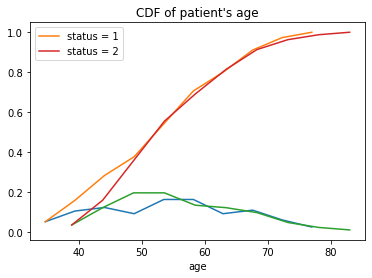

In [51]:
#Plot CDF of age
import numpy as np

long_survival = haberman[haberman['status'] == 1]
short_survival = haberman[haberman['status'] == 2]

counts, bin_edges = np.histogram(long_survival['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label='status = 1')

counts, bin_edges = np.histogram(short_survival['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label='status = 2')
plt.legend(loc="upper left")

plt.title("CDF of patient's age")
plt.xlabel('age')

plt.show();


<h5>Observation:</h5>
<p>There's a large discrpenacy between survival status below the patient's age of 50 years. The longer survival period is significantly more likely for patient's younger than 50 years than shorter survival period.</p>

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


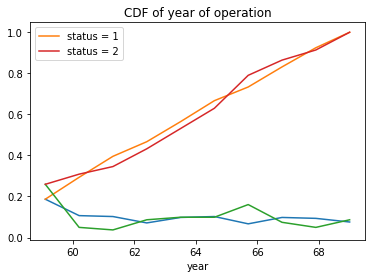

In [11]:
#Plot CDF of year

counts, bin_edges = np.histogram(long_survival['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label='status = 1')

counts, bin_edges = np.histogram(short_survival['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label='status = 2')

plt.legend(loc="upper left")
plt.title("CDF of year of operation")

plt.xlabel('year')

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


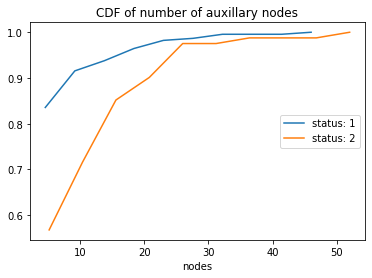

In [12]:
#Plot CDF of nodes

counts, bin_edges = np.histogram(long_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
print("cdf",cdf);
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label='status: 1')

counts, bin_edges = np.histogram(short_survival['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
print('cdf',cdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='status: 2')

plt.legend(loc="center right")
plt.title("CDF of number of auxillary nodes")

plt.xlabel('nodes')

plt.show();

<h5>Observation:</h5>
<p>The longer survival period is more significantly more likely than shorter survial period throughout the distribution, with a very large discrepancy below the value of 25 for number of auxillary nodes.</p>

status
1    52.017778
2    53.679012
Name: age, dtype: float64


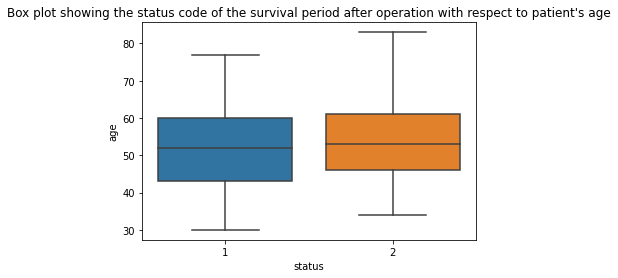

In [52]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box plot showing the status code of the survival period after operation with respect to patient's age")
plt.show()

<h5>Observation</h5>
<p>It seems chances of shorter survival period increases with the patient's age. The median of patient's age for longer survial period is 52 and 53 years for shorter survival period. </p>

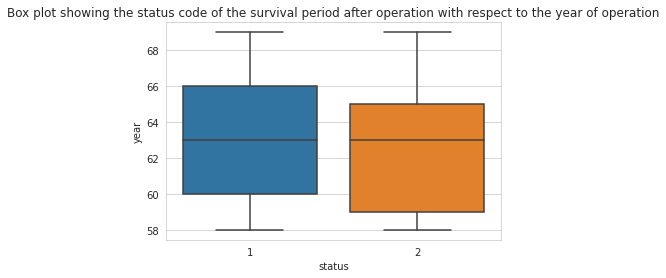

In [73]:
sns.boxplot(x='status',y='year', data=haberman)
plt.title('Box plot showing the status code of the survival period after operation with respect to the year of operation')
plt.show()

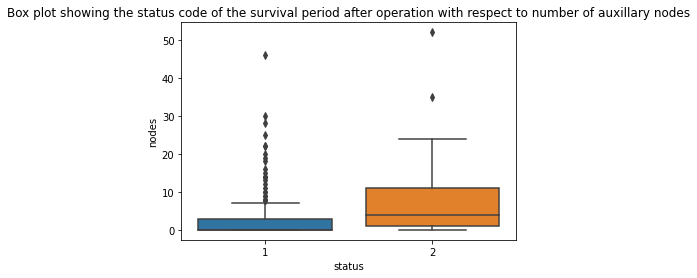

In [53]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box plot showing the status code of the survival period after operation with respect to number of auxillary nodes')
plt.show()

<h5>Observation</h5>
<p>The box above shows outliers. Majority of outliers are around longer survival status box that are removed in the plot below to get a clean output.</p>

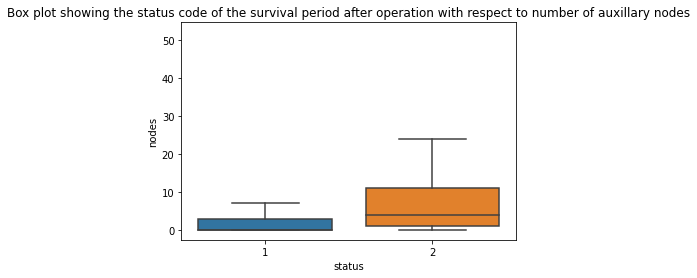

In [11]:
sns.boxplot(x='status',y='nodes', data=haberman, fliersize = 0)
plt.title('Box plot showing the status code of the survival period after operation with respect to number of auxillary nodes')
plt.show()

<h5>Observation</h5>
<p>It seems chances of shorter survival period increases with the number of nodes. The median of number of auxillary nodes for longer survial period is 0 and 4 for shorter survival period. There's less amount of overlapping for extreme values of auxillary nodes for the shorter survival period (class with status code 2) with longer survival period (class with status code 1). </p>

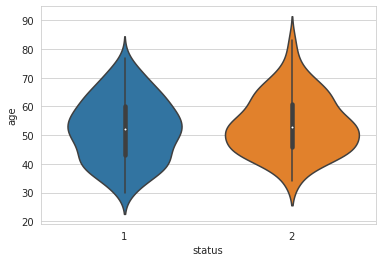

In [43]:
sns.violinplot(x="status", y="age", data=hbrmn, size=8)
plt.show()

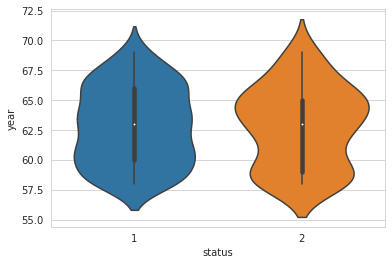

In [44]:
sns.violinplot(x="status", y="year", data=hbrmn, size=8)
plt.show()

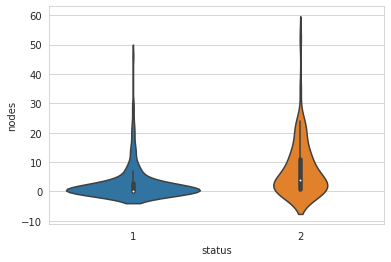

In [32]:
sns.violinplot(x="status", y="nodes", data=hbrmn, size=8)
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


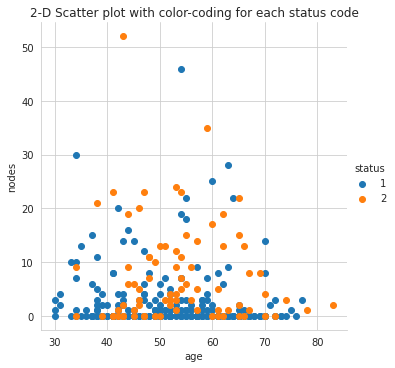

In [36]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each status code')
plt.show();

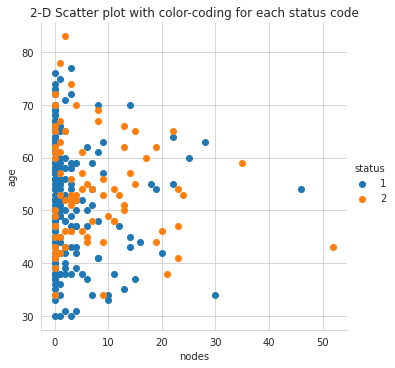

In [46]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 5) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each status code')
plt.show();

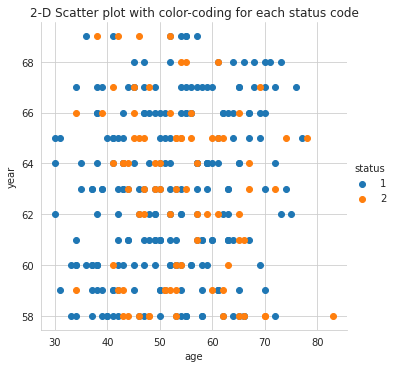

In [44]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 5) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each status code')
plt.show();

<h5>Obsevation:</h5>
<p>The points scattered throughout the graph indicates that there is no obvious relationship between patient's age and year of operation in haberman data set. </p>

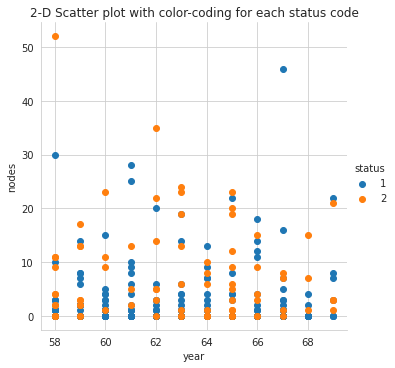

In [45]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 5) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each status code')
plt.show();

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

<h4>Summary</h4>
<p>The patient's age and number of auxillary nodes are key features that are the important for the classification task.</p>
<p> There's lack of any relationship between any pairs of features.</p>